# Homework 1

## 1. Uniform Samples from a circular region

\begin{equation}
\begin{split}
F(r) &= \int^{r}_{-\infty} p(r) \, dr \\
&= \int^{r}_{-\infty} \mathbf{1}_{\{0 \le r \le 1 \}} \, 2r \, dr
&= \mathbf{1}_{\{0 \le r \le 1 \}} r^2 + \mathbf{1}_{\{1 < r \}}
\end{split}
\end{equation}

or simply $F(R) = R^2$ in the interval $R \in [0,1]$. By taking inverse of the cumulative distribution,
\begin{equation}
\begin{split}
U &= F(R) \\
R &= F^{-1}(U) \\
R &= \sqrt{U}
\end{split}
\end{equation}

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from numpy import linalg as LA

In [2]:
def norm(x,p): # p-norm of vector x
    xx = np.power(np.absolute(x),p)
    return np.power(np.sum(xx),1.0/p)

In [3]:
def sampleR(size=1): 
    return np.sqrt(np.random.rand(size))

In [4]:
def sampleTheta(size=1):
    return 2*np.pi*np.random.rand(size)

In [5]:
def sampleFromUnitBall(N=1):
    Theta = sampleTheta(N)
    R = sampleR(N)
    return R*np.sin(Theta), R*np.cos(Theta)

In [6]:
x,y = sampleFromUnitBall(1000)

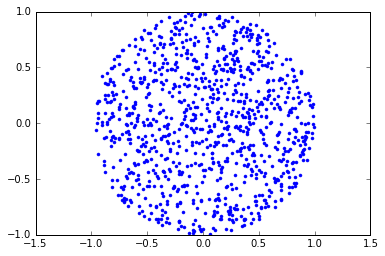

In [7]:
plt.axis('equal')
plt.plot(x, y, '.')
plt.show()

## 2.Rejection sampling on norm balls 

#### Acceptance rate
Let $x$ be the the sample drawn from proposal distribution and $r$ be the acceptance rate. And $M$ be the number of trials. 

\begin{equation}
\begin{split}
r &= P( \|x\|_p \leq 1 ) \\
&= \left< \mathbb{1}_{\{\|x\|_p \leq 1 \}} \right>_{p(x)} \\
&\approx \dfrac{\sum^{M}_{i=1}\mathbb{1}_{\{\|x_i\|_p \leq 1 \}} }{M} \\
\end{split}
\end{equation}

and also if we choose proposal as uniform distribution on euclidian norm ball:

$$
r = \dfrac{\mbox{Area of unit norm ball for p} }{\mbox{Area of unit euclidian norm ball} }
= \dfrac{\mbox{Area of unit norm ball for p} }{\pi}
$$



In [8]:
def sampleFromNormBall(p,N=1):
    i=0 # number of success
    r=0 # number of fails
    x,y = np.empty(N,dtype=float),np.empty(N,dtype=float)
    while(i<N): # until N success
        [x_i],[y_i] = sampleFromUnitBall(1)
        alpha = LA.norm([x_i,y_i],p)
        if alpha > 1: # reject if point is outside
            r=r+1;
        else: # accept the sample
            x[i],y[i] = x_i,y_i
            i = i+1
    return x,y, float(N)/(N+r)

### Samples from norm ball for $p=0.7$

#### Proposal is unit euclidian norm ball

In [9]:
x,y,r = sampleFromNormBall(0.7,N=1000)

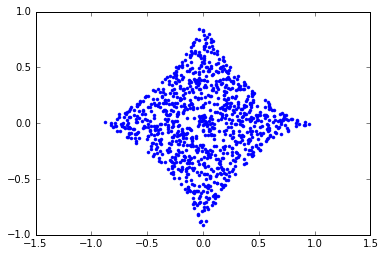

In [10]:
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [11]:
print "Acceptance rate = ",r

Acceptance rate =  0.4095004095


#### Proposal is unit norm ball for $p=1$

Acceptance rate is the proportion of the area of target distribution and proposal distribution. Unit norm ball with p=1 has less area than euclidian norm ball. So it should give better acceptance rate.

To sample from unit norm ball with p=1, generate samples uniformly from $[-1,1] \times [-1,1]$. Then rotate and scale them by matrix $A$, where

$$
A = \dfrac{1}{2}
\begin{bmatrix}
1 & -1 \\
1 & 1
\end{bmatrix}
$$

In [12]:
def sampleFromNormBall_1(N=1):
    A = (1.0/2) * np.array([[1, -1],[1,1]])
    samp = 2*np.random.rand(2,N) - 1
    samp = np.einsum("ij,jk->ik",A,samp) # matrix multiplication of A and samp
    return samp[0,:],samp[1,:]

In [13]:
def sampleFromLittleNormBall(p,N=1):
    i=0
    r=0
    x,y = np.empty(N,dtype=float),np.empty(N,dtype=float)
    while(i<N):
        [x_i],[y_i] = sampleFromNormBall_1(1)
        alpha = LA.norm([x_i,y_i],p)
        if alpha > 1:
            r=r+1;
        else:
            x[i],y[i] = x_i,y_i
            i = i+1
    return x,y, float(N)/(N+r)

In [14]:
x,y,r = sampleFromLittleNormBall(0.7,N=1000)

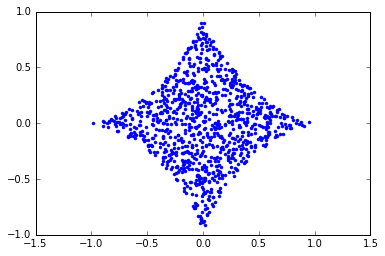

In [15]:
plt.plot(x, y, 'b.')
plt.axis('equal')
plt.show()

In [16]:
print "Acceptance rate = ", r

Acceptance rate =  0.641025641026


### Samples from norm ball for $p=1.5$

In [17]:
x,y,r = sampleFromNormBall(1.5,N=1000)

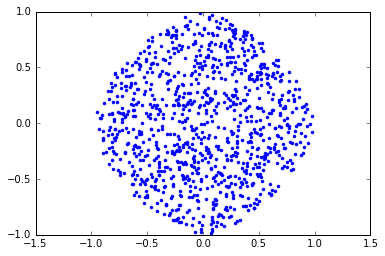

In [18]:
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [19]:
print "Acceptance rate = ",r

Acceptance rate =  0.882612533098


## Bonus: Uniform samples from unit n-sphere

Let $x$ be a random variable from $\mathcal{N}(0,I)$. Then pdf of $x$,
$$
p(x) = \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{1}{2}x^Tx) = \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{1}{2}\|x\|^2_2)
$$
and the conditional probability,
\begin{equation}
\begin{split}
p(x \mid \|x\|_2 = r) & \propto p(\|x\|_2 = r \mid x) \, p(x) \\
&= \mathbb{1}_{\{\|x\|_2 = r \}} \, p(x)\\
& \propto \mathbb{1}_{\{\|x\|_2 = r \}} \, exp(-\dfrac{1}{2}\|x\|^2_2) \\
& = \mathbb{1}_{\{\|x\|_2 = r \}} \, exp(-\dfrac{1}{2}r^2)
\end{split}
\end{equation}

So, $p(x \mid \|x\|_2 = r)$ is uniform on $\|x\|_2 = r$. Then we can use multivariate normal distribution for sampling uniform direction.

#### Volume of n-sphere

Let $V_n(r)$ denote the volume of n-sphere with radius $r$. Then,

$$
V_n(r) = \int_{\sum^n_{i=1} x^2_i \leq r^2} \prod^n_{i=1} dx_i
$$

by change of variables, $y_i = \dfrac{x_i}{r}$

$$
dx_i = r\,dy_i
$$

\begin{equation}
\begin{split}
V_n(r) & = \int_{\sum^n_{i=1} x^2_i \leq r^2} \prod^n_{i=1} dx_i \\
& = \int_{\sum^n_{i=1} x^2_i/r^2 \leq 1} \prod^n_{i=1} dx_i \\
& = \int_{\sum^n_{i=1} y^2_i \leq 1} \prod^n_{i=1} r\,dy_i \\
& = r^n \int_{\sum^n_{i=1} y^2_i \leq 1} \prod^n_{i=1} dy_i \\
& = r^n V_n(1)
\end{split}
\end{equation}


#### Cumulative Distribution Function of Radius

Let $X$ be an uniform sample from n-sphere and $R$ be the distance of $X$ from the origin. Then the probability of $R \leq r$ should be the proportion of volumes of n-spheres with radius r and 1. The cumulative distribution function of $R$,

\begin{equation}
\begin{split}
F(r) & = p(R \leq r)  \\
& = \dfrac{V_n(r)}{V_n(1)} \\
& = r^n
\end{split}
\end{equation}

Additionally, we have
$$
p(R=r) = \dfrac{dF}{dr} = n r^{n-1}
$$

To sample $R$ by inversion method,
\begin{equation}
\begin{split}
U &= F(R) \\
R &= F^{-1}(U) \\
R &= \sqrt[n]{U}
\end{split}
\end{equation}

#### Implementation

In [20]:
def sampleFromNBall(n,N=1):
    mult = np.random.multivariate_normal(np.zeros(n),np.eye(n),N)
    direction = np.array([x / LA.norm(x) for x in mult])
    magnitude = np.power(np.random.rand(N),1/float(n))
    return np.einsum("i...,i->i...",direction,magnitude)

#### Simulations

##### 2-sphere

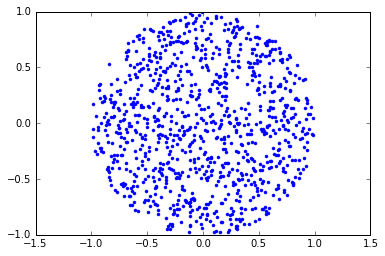

In [21]:
samples=sampleFromNBall(2,1000)
plt.plot(samples[:,0], samples[:,1], '.')
plt.axis('equal')
plt.show()

##### 3-sphere

In [22]:
samples=sampleFromNBall(3,500)

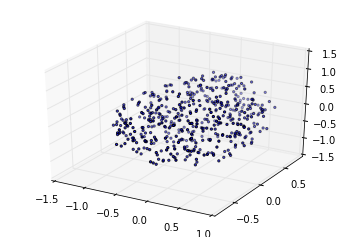

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(samples[:,0],samples[:,1],samples[:,2],marker='.')
plt.axis('equal')
plt.show()

##### Projections of  6-sphere

In [24]:
samples=sampleFromNBall(6,1000)

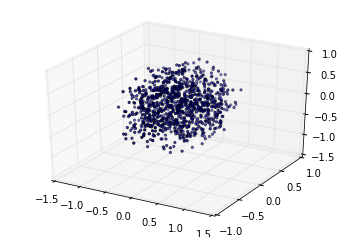

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(samples[:,0],samples[:,1],samples[:,2],marker='.')
plt.axis('equal')
plt.show()

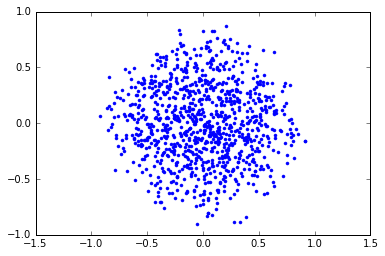

In [26]:
plt.plot(samples[:,0], samples[:,1], '.')
plt.axis('equal')
plt.show()

Samples are concentrated at the center, when they are orthogonally projected into lower dimensions. This behavior is expected, because volume over an area decreases with the distance to the origin. 

##### Cumilative histogram of norms of points  and $r^n$

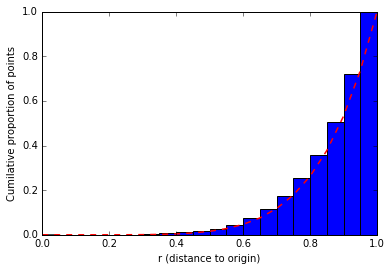

In [27]:
norms = LA.norm(samples,2,axis=1)
bins = np.linspace(0,1,21)
n, bins, patches = plt.hist(norms, bins, normed=True, cumulative=True)
plt.xlabel("r (distance to origin)")
plt.ylabel("Cumilative proportion of points")
plt.plot(bins, bins**6, 'r--', linewidth=1.5) # plot of r^n

#### Rejection Sampling Acceptance Rate for Uniform Samples from n-sphere

$$
\mbox{Acceptance rate} = \dfrac{\mbox{Volume of n-sphere}}{\mbox{Volume of hypercube}} 
= \dfrac{(\sqrt{\pi}/2)^n}{\Gamma(n/2 + 1)}
$$

Therefore, $\mbox{Acceptance rate} \to 0$ as $n \to \infty$.

Let's simulate it for $n \in \{2,\cdots,10\}$ and observe the acceptance rates.

In [28]:
def acceptanceRateNBall(n,N=1):
    i=0
    r=0
    while(i<N):
        x = np.random.rand(n)*2-1
        alpha = LA.norm(x,2)
        if alpha > 1:
            r=r+1;
        else:
            i = i+1
    return float(N)/(N+r)

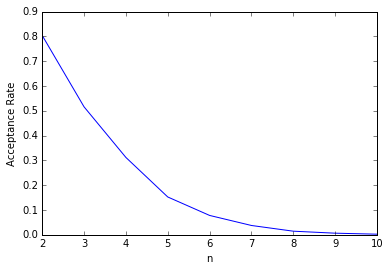

In [29]:
plt.xlabel("n")
plt.ylabel("Acceptance Rate")
plt.plot(range(2,11),[acceptanceRateNBall(i,500) for i in range(2,11)])